# Loteca matches found

In this notebook, we will explorer which loteca matches were found.

There was already a notebook like that, but this one uses updated data (after
we refactored lots of them algorithms).

We have some objectives:

- Check if the matches found are enough to make a model
- Check if there are some matches not found that can easily be added to fulfill a "round"
- Take a look at the matches/rounds found along the time

**Remember**: There are some matches that didn't happen. For these, we don't have 
odds information.

## Load data

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from src.util import load_pickle

matches = load_pickle('../data/process/loteca_matches.pkl')
found_ids = load_pickle('../data/interim/loteca_matchlist.pkl')

## Explore

In [3]:
matches.head()

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened
5110,366,1,2009-06-07,CRUZEIRO/MG,1,INTERNACIONAL/RS,1,True
5111,366,2,2009-06-07,ATLÉTICO/PR,0,ATLÉTICO/MG,4,True
5112,366,3,2009-06-07,AVAÍ/SC,0,SÃO PAULO/SP,0,True
5113,366,4,2009-06-06,AMÉRICA/RN,2,BRASILIENSE/DF,1,True
5114,366,5,2009-06-06,PONTE PRETA/SP,5,PORTUGUESA DESPORTOS/SP,2,True


In [4]:
# there are 6004 loteca matches
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6004 entries, 5110 to 11113
Data columns (total 8 columns):
roundno     6004 non-null int64
gameno      6004 non-null int64
date        5950 non-null datetime64[ns]
team_h      6004 non-null object
goals_h     6004 non-null int64
team_a      6004 non-null object
goals_a     6004 non-null int64
happened    6004 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 381.1+ KB


In [5]:
# of those, 5950 happened and 54 didn't
matches.happened.value_counts()

True     5950
False      54
Name: happened, dtype: int64

In [6]:
# let's worry only about those that happened
matches = matches[matches.happened]

In [7]:
# all found matches happened
all([id in matches.index for id in found_ids])

True

In [8]:
found_ids[:5]

[5110, 5112, 5120, 5121, 5124]

In [9]:
# 4969 matches were found
len(found_ids)

4981

In [10]:
# this percentage
4969 / 5950

0.8351260504201681

## Assemble everything into the matches DataFrame

In [11]:
matches = matches.copy()
matches['found'] = matches.index.isin(found_ids)
matches.head()

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found
5110,366,1,2009-06-07,CRUZEIRO/MG,1,INTERNACIONAL/RS,1,True,True
5111,366,2,2009-06-07,ATLÉTICO/PR,0,ATLÉTICO/MG,4,True,True
5112,366,3,2009-06-07,AVAÍ/SC,0,SÃO PAULO/SP,0,True,True
5113,366,4,2009-06-06,AMÉRICA/RN,2,BRASILIENSE/DF,1,True,True
5114,366,5,2009-06-06,PONTE PRETA/SP,5,PORTUGUESA DESPORTOS/SP,2,True,True


In [12]:
# see results by round
rounds = matches.groupby('roundno').found.sum().astype(int)
rounds.head()

roundno
366    12
367    12
368    14
369    12
370    12
Name: found, dtype: int64

In [13]:
rounds.value_counts()

14    217
13     64
12     37
6      16
10     14
0      14
5      13
11     11
7       9
8       8
4       8
9       7
3       4
2       4
1       3
Name: found, dtype: int64

In [14]:
# so we have completely found half of the rounds
# there are also lots of rounds with 13 or 12 founds
# we can explorer them a bit more
rounds.value_counts() / len(rounds)

14    0.505828
13    0.149184
12    0.086247
6     0.037296
10    0.032634
0     0.032634
5     0.030303
11    0.025641
7     0.020979
8     0.018648
4     0.018648
9     0.016317
3     0.009324
2     0.009324
1     0.006993
Name: found, dtype: float64

In [15]:
_rounds = rounds.to_frame().rename(columns={'found': 'nfound'}).reset_index()
matches = matches.merge(_rounds, how='left', on='roundno')

In [16]:
close = matches[matches.nfound.isin([12, 13]) & ~matches.found]
close.head()

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found,nfound
7,366,8,2009-06-07,CONFIANÇA/SE,1,SERGIPE/SE,2,True,False,12
8,366,9,2009-06-07,CRB/AL,0,ASA/AL,1,True,False,12
18,367,5,2009-06-14,PAYSANDU/PA,3,RIO BRANCO/AC,1,True,False,12
19,367,6,2009-06-14,BRASIL/RS,1,CRICIÚMA/SC,0,True,False,12
49,369,8,2009-06-27,CRB/AL,1,ICASA/CE,2,True,False,12


In [22]:
# there are still 80 rounds we could
# potentially have saved...
close.roundno.nunique()

80

In [18]:
# first, let's take a look in the last rounds

close.tail(10)[::-1]

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found,nfound
5906,791,12,2018-03-18,SPORTING CLUBE/PRT,2,RIO AVE/PRT,0,True,False,13
5844,787,5,2018-02-19,VITÓRIA/BA,1,BAHIA/BA,1,True,False,13
5306,748,8,2017-05-07,REMO/PA,1,PAYSANDU/PA,2,True,False,12
5288,747,4,2017-04-30,PAYSANDU/PA,1,REMO/PA,1,True,False,13
5283,746,13,2017-04-23,NOVO HAMBURGO/RS,1,GRÊMIO/RS,1,True,False,12
5279,746,9,2017-04-23,MOGI MIRIM/SP,1,RIO PRETO/SP,2,True,False,12
5232,743,4,2017-04-01,RIO BRANCO/ES,2,LUVERDENSE/MT,2,True,False,13
5119,734,13,2017-01-28,VITÓRIA/ES,1,LINHARES/ES,0,True,False,13
4946,721,9,2016-10-01,CAXIAS/RS,0,YPIRANGA/RS,1,True,False,12
4945,721,8,2016-10-01,XV PIRACICABA/SP,1,PENAPOLENSE/SP,0,True,False,12


Things that are missing:

- This match ([1]), that was awarded to Bahia.
- Remo x Paysandu and Paysandu x Remo teams are in the wrong order.
- Novo Hamburgo x Grêmio = (wrong date + wrong score (penalties))
- Rio Branco x Luverdense teams were not captured anywhere (and their match date was wrong)

These mismatchings probably takes a really small part of the rounds,
and, they are too much trouble to mess up with. So, we are going to 
accept the algorithm as it is and use what we've got. Later, if more
data is needed, things can always be tuned.

[1]: http://www.betexplorer.com/soccer/brazil/campeonato-baiano/vitoria-bahia/GOQ5oQD2/

# Comparing the amount of matches found over time

In [20]:
_rounds = rounds.to_frame().rename(columns={'found': 'nfound'})
_dates = matches.groupby('roundno').date.max()
_rounds = _rounds.join(_dates)
_rounds.head()

,nfound,date
roundno,,
366,12,2009-06-07
367,12,2009-06-14
368,14,2009-06-21
369,12,2009-06-28
370,12,2009-07-05


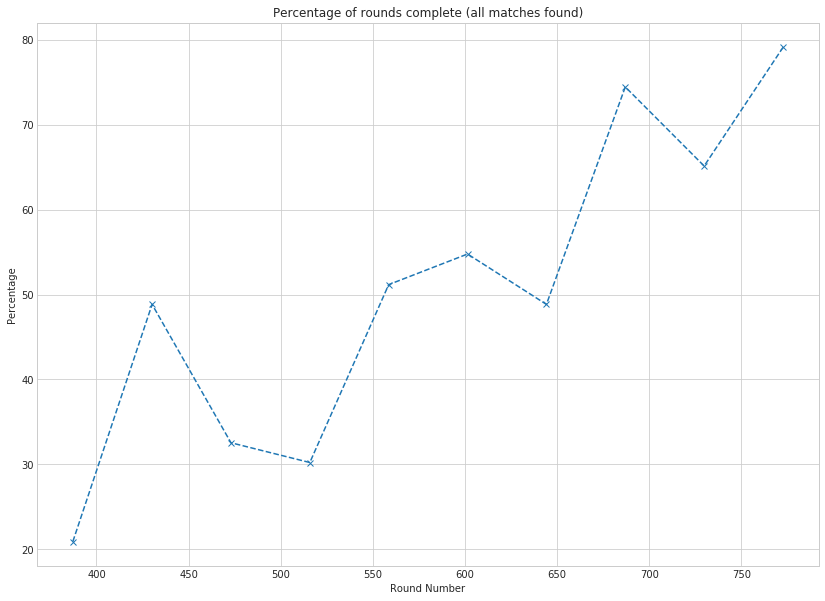

In [24]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

cut = pd.cut(_rounds.index, 10)

ys = _rounds.groupby(cut).apply(lambda x: (x.nfound == 14).sum() / len(x)) * 100
xs = [x.mid for x in ys.index]

plt.figure(figsize=(14, 10))
plt.plot(xs, ys, 'x--')
plt.title("Percentage of rounds complete (all matches found)");
plt.xlabel("Round Number")
plt.ylabel("Percentage");